In [ ]:
import pandas as pd
from scipy import stats
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.api as sm
from sklearn.model_selection import train_test_split
import numpy as np

In [2]:
train_data = pd.read_csv("C:/Users/hp/Documents/Train.game.csv")
test_data = pd.read_csv("C:/Users/hp/Downloads/Test.game.csv")

In [3]:
train_data['source']='train_data'
test_data['source']='test_data'
game = pd.concat([train_data,test_data], ignore_index = True)

In [4]:
game.head()

,Name,Platform,Year_of_Release,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Critic_Score,Critic_Count,User_Score,User_Count,Developer,Rating,Global_Sales,source
0,Wii Sports,Wii,2006.0,Sports,Nintendo,41.36,28.96,3.77,76.0,51.0,8,322.0,Nintendo,E,82.53,train_data
1,Super Mario Bros.,NES,1985.0,Platform,Nintendo,29.08,3.58,6.81,NaN,NaN,NaN,NaN,NaN,NaN,40.24,train_data
2,Mario Kart Wii,Wii,2008.0,Racing,Nintendo,15.68,12.76,3.79,82.0,73.0,8.3,709.0,Nintendo,E,35.52,train_data
3,Wii Sports Resort,Wii,2009.0,Sports,Nintendo,15.61,10.93,3.28,80.0,73.0,8,192.0,Nintendo,E,32.77,train_data
4,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,Nintendo,11.27,8.89,10.22,NaN,NaN,NaN,NaN,NaN,NaN,31.37,train_data


In [5]:
train_data.drop("source",axis=1)

,Name,Platform,Year_of_Release,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Critic_Score,Critic_Count,User_Score,User_Count,Developer,Rating,Global_Sales
0,Wii Sports,Wii,2006.0,Sports,Nintendo,41.36,28.96,3.77,76.0,51.0,8,322.0,Nintendo,E,82.53
1,Super Mario Bros.,NES,1985.0,Platform,Nintendo,29.08,3.58,6.81,NaN,NaN,NaN,NaN,NaN,NaN,40.24
2,Mario Kart Wii,Wii,2008.0,Racing,Nintendo,15.68,12.76,3.79,82.0,73.0,8.3,709.0,Nintendo,E,35.52
3,Wii Sports Resort,Wii,2009.0,Sports,Nintendo,15.61,10.93,3.28,80.0,73.0,8,192.0,Nintendo,E,32.77
4,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,Nintendo,11.27,8.89,10.22,NaN,NaN,NaN,NaN,NaN,NaN,31.37
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
14571,Samurai Warriors: Sanada Maru,PS3,2016.0,Action,Tecmo Koei,0.00,0.00,0.01,NaN,NaN,NaN,NaN,NaN,NaN,0.01
14572,LMA Manager 2007,X360,2006.0,Sports,Codemasters,0.00,0.01,0.00,NaN,NaN,NaN,NaN,NaN,NaN,0.01
14573,Haitaka no Psychedelica,PSV,2016.0,Adventure,Idea Factory,0.00,0.00,0.01,NaN,NaN,NaN,NaN,NaN,NaN,0.01
14574,Spirits & Spells,GBA,2003.0,Platform,Wanadoo,0.01,0.00,0.00,NaN,NaN,NaN,NaN,NaN,NaN,0.01


In [6]:
test_data.drop("source",axis=1)

,Name,Platform,Year_of_Release,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Critic_Score,Critic_Count,User_Score,User_Count,Developer,Rating
0,Nicktoons: MLB,X360,2011.0,Sports,Take-Two Interactive,0.12,0.00,0.0,NaN,NaN,7.6,7.0,High Voltage Software,E
1,Shonen Jump's One Piece: Grand Battle,PS2,2005.0,Fighting,Atari,0.07,0.05,0.0,NaN,NaN,NaN,NaN,NaN,NaN
2,Learn Math,DS,2009.0,Puzzle,DreamCatcher Interactive,0.12,0.00,0.0,NaN,NaN,tbd,NaN,Dreamcatcher,E
3,Nitrobike,Wii,2008.0,Racing,Ubisoft,0.11,0.01,0.0,49.0,22.0,7.1,7.0,Left Field Productions,E10+
4,Cruise Ship Vacation Games,Wii,2009.0,Puzzle,Avanquest,0.12,0.00,0.0,NaN,NaN,tbd,NaN,Activision,E
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2138,Theresia...,DS,2008.0,Adventure,Arc System Works,0.05,0.00,0.0,61.0,6.0,8,8.0,WorkJam,M
2139,Sacred 2: Fallen Angel,PC,2008.0,Role-Playing,Ascaron Entertainment GmbH,0.00,0.05,0.0,71.0,41.0,6.9,203.0,"Ascaron Entertainment GmbH, Ascaron Entertainment",M
2140,Dance Sensation!,Wii,2010.0,Misc,Majesco Entertainment,0.06,0.00,0.0,NaN,NaN,NaN,NaN,NaN,NaN
2141,Adventure Time: The Secret of the Nameless Kin...,X360,2014.0,Action,Little Orbit,0.00,0.05,0.0,58.0,5.0,7.5,4.0,WayForward,E10+


In [7]:
train_data.head()

,Name,Platform,Year_of_Release,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Critic_Score,Critic_Count,User_Score,User_Count,Developer,Rating,Global_Sales,source
0,Wii Sports,Wii,2006.0,Sports,Nintendo,41.36,28.96,3.77,76.0,51.0,8,322.0,Nintendo,E,82.53,train_data
1,Super Mario Bros.,NES,1985.0,Platform,Nintendo,29.08,3.58,6.81,NaN,NaN,NaN,NaN,NaN,NaN,40.24,train_data
2,Mario Kart Wii,Wii,2008.0,Racing,Nintendo,15.68,12.76,3.79,82.0,73.0,8.3,709.0,Nintendo,E,35.52,train_data
3,Wii Sports Resort,Wii,2009.0,Sports,Nintendo,15.61,10.93,3.28,80.0,73.0,8,192.0,Nintendo,E,32.77,train_data
4,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,Nintendo,11.27,8.89,10.22,NaN,NaN,NaN,NaN,NaN,NaN,31.37,train_data


In [8]:
test_data.head()

,Name,Platform,Year_of_Release,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Critic_Score,Critic_Count,User_Score,User_Count,Developer,Rating,source
0,Nicktoons: MLB,X360,2011.0,Sports,Take-Two Interactive,0.12,0.00,0.0,NaN,NaN,7.6,7.0,High Voltage Software,E,test_data
1,Shonen Jump's One Piece: Grand Battle,PS2,2005.0,Fighting,Atari,0.07,0.05,0.0,NaN,NaN,NaN,NaN,NaN,NaN,test_data
2,Learn Math,DS,2009.0,Puzzle,DreamCatcher Interactive,0.12,0.00,0.0,NaN,NaN,tbd,NaN,Dreamcatcher,E,test_data
3,Nitrobike,Wii,2008.0,Racing,Ubisoft,0.11,0.01,0.0,49.0,22.0,7.1,7.0,Left Field Productions,E10+,test_data
4,Cruise Ship Vacation Games,Wii,2009.0,Puzzle,Avanquest,0.12,0.00,0.0,NaN,NaN,tbd,NaN,Activision,E,test_data


In [9]:
train_data.isnull().sum()

Name                  2
Platform              0
Year_of_Release     232
Genre                 2
Publisher            49
NA_Sales              0
EU_Sales              0
JP_Sales              0
Critic_Score       7359
Critic_Count       7359
User_Score         5816
User_Count         7780
Developer          5747
Rating             5872
Global_Sales          0
source                0
dtype: int64

In [10]:
test_data.isnull().sum()

Name                  0
Platform              0
Year_of_Release      37
Genre                 0
Publisher             5
NA_Sales              0
EU_Sales              0
JP_Sales              0
Critic_Score       1223
Critic_Count       1223
User_Score          888
User_Count         1349
Developer           876
Rating              897
source                0
dtype: int64

In [11]:
game.isnull().sum()

Name                  2
Platform              0
Year_of_Release     269
Genre                 2
Publisher            54
NA_Sales              0
EU_Sales              0
JP_Sales              0
Critic_Score       8582
Critic_Count       8582
User_Score         6704
User_Count         9129
Developer          6623
Rating             6769
Global_Sales       2143
source                0
dtype: int64

In [12]:
datavalue=[train_data,test_data]

In [13]:
print(datavalue)

[                                Name Platform  Year_of_Release         Genre  \
0                         Wii Sports      Wii           2006.0        Sports   
1                  Super Mario Bros.      NES           1985.0      Platform   
2                     Mario Kart Wii      Wii           2008.0        Racing   
3                  Wii Sports Resort      Wii           2009.0        Sports   
4           Pokemon Red/Pokemon Blue       GB           1996.0  Role-Playing   
...                              ...      ...              ...           ...   
14571  Samurai Warriors: Sanada Maru      PS3           2016.0        Action   
14572               LMA Manager 2007     X360           2006.0        Sports   
14573        Haitaka no Psychedelica      PSV           2016.0     Adventure   
14574               Spirits & Spells      GBA           2003.0      Platform   
14575            Winning Post 8 2016      PSV           2016.0    Simulation   

          Publisher  NA_Sales  EU_Sale

In [14]:
game.Name.fillna(0,inplace=True)

In [15]:
game.Name.isnull().sum()

0

In [16]:
game.Genre.fillna(0,inplace=True)

In [17]:
game.Genre.isnull().sum()

0

In [18]:
game.Critic_Score.fillna(0,inplace=True) 

In [19]:
game.Critic_Score.isnull().sum() 

0

In [20]:
game.Critic_Count.fillna(0,inplace=True) 

In [21]:
game.Critic_Count.isnull().sum()

0

In [22]:
game.User_Score.fillna(0,inplace=True)

In [23]:
game.User_Score.isnull().sum()

0

In [24]:
game.User_Count.fillna(0,inplace=True)

In [25]:
game.User_Count.isnull().sum()

0

In [26]:
game.Developer.fillna(0,inplace=True)

In [27]:
game.Developer.isnull().sum()

0

In [28]:
game.Rating.fillna(0,inplace=True)

In [29]:
game.Rating.isnull().sum()

0

In [30]:
game.Global_Sales.fillna(0,inplace=True)

In [31]:
game.Global_Sales.isnull().sum()

0

In [32]:
game.drop(['Publisher','Year_of_Release'],inplace=True,axis=1)

In [33]:
game.head()

,Name,Platform,Genre,NA_Sales,EU_Sales,JP_Sales,Critic_Score,Critic_Count,User_Score,User_Count,Developer,Rating,Global_Sales,source
0,Wii Sports,Wii,Sports,41.36,28.96,3.77,76.0,51.0,8,322.0,Nintendo,E,82.53,train_data
1,Super Mario Bros.,NES,Platform,29.08,3.58,6.81,0.0,0.0,0,0.0,0,0,40.24,train_data
2,Mario Kart Wii,Wii,Racing,15.68,12.76,3.79,82.0,73.0,8.3,709.0,Nintendo,E,35.52,train_data
3,Wii Sports Resort,Wii,Sports,15.61,10.93,3.28,80.0,73.0,8,192.0,Nintendo,E,32.77,train_data
4,Pokemon Red/Pokemon Blue,GB,Role-Playing,11.27,8.89,10.22,0.0,0.0,0,0.0,0,0,31.37,train_data


In [34]:
game.isnull().sum()

Name            0
Platform        0
Genre           0
NA_Sales        0
EU_Sales        0
JP_Sales        0
Critic_Score    0
Critic_Count    0
User_Score      0
User_Count      0
Developer       0
Rating          0
Global_Sales    0
source          0
dtype: int64

In [37]:
game.columns

Index(['Name', 'Platform', 'Genre', 'NA_Sales', 'EU_Sales', 'JP_Sales',
       'Critic_Score', 'Critic_Count', 'User_Score', 'User_Count', 'Developer',
       'Rating', 'Global_Sales', 'source'],
      dtype='object')

In [38]:
from sklearn.preprocessing import MinMaxScaler

In [39]:
dummy_var=pd.get_dummies(game)

In [107]:
game.shape

(16719, 14)

In [40]:
dummy_var.columns

Index(['NA_Sales', 'EU_Sales', 'JP_Sales', 'Critic_Score', 'Critic_Count',
       'User_Count', 'Global_Sales', 'Name_0',
       'Name_.hack//G.U. Vol.1//Rebirth', 'Name_.hack//G.U. Vol.2//Reminisce',
       ...
       'Rating_AO', 'Rating_E', 'Rating_E10+', 'Rating_EC', 'Rating_K-A',
       'Rating_M', 'Rating_RP', 'Rating_T', 'source_test_data',
       'source_train_data'],
      dtype='object', length=13419)

In [113]:
scaler=MinMaxScaler().fit(dummy_var)

In [115]:
scaled_data=scaler.transform(dummy_var)

In [118]:
X=pd.DataFrame(scaled_data)

In [119]:
X.head()

,0,1,2,3,4,5,6,7,8,9,...,13409,13410,13411,13412,13413,13414,13415,13416,13417,13418
0,1.000000,1.000000,0.368885,0.775510,0.451327,0.030192,1.000000,0.0,0.0,0.0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
1,0.703095,0.123619,0.666341,0.000000,0.000000,0.000000,0.487580,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
2,0.379110,0.440608,0.370841,0.836735,0.646018,0.066479,0.430389,0.0,0.0,0.0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
3,0.377418,0.377417,0.320939,0.816327,0.646018,0.018003,0.397068,0.0,0.0,0.0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
4,0.272485,0.306975,1.000000,0.000000,0.000000,0.000000,0.380104,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0


In [120]:
y=dummy_var.Global_Sales

In [121]:
x=dummy_var.drop('Global_Sales',axis=1)

{'whiskers': [<matplotlib.lines.Line2D at 0x204cc0bea30>,
 'caps': [<matplotlib.lines.Line2D at 0x204cc0b3190>,
 'boxes': [<matplotlib.lines.Line2D at 0x204cc0be6a0>],
 'medians': [<matplotlib.lines.Line2D at 0x204cc0b38b0>],
 'fliers': [<matplotlib.lines.Line2D at 0x204cc0b3c40>],
 'means': []}

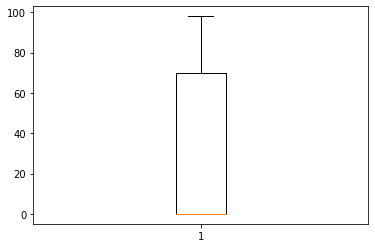

In [122]:
plt.boxplot(game.Critic_Score)

{'whiskers': [<matplotlib.lines.Line2D at 0x204c99f9850>,
 'caps': [<matplotlib.lines.Line2D at 0x204c99f9f70>,
 'boxes': [<matplotlib.lines.Line2D at 0x204c99f94c0>],
 'medians': [<matplotlib.lines.Line2D at 0x204c9a066d0>],
 'fliers': [<matplotlib.lines.Line2D at 0x204c9a06a60>],
 'means': []}

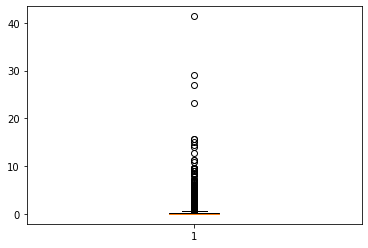

In [55]:
plt.boxplot(game.NA_Sales)

{'whiskers': [<matplotlib.lines.Line2D at 0x204d784c400>,
 'caps': [<matplotlib.lines.Line2D at 0x204d784cb20>,
 'boxes': [<matplotlib.lines.Line2D at 0x204d784c070>],
 'medians': [<matplotlib.lines.Line2D at 0x204d7858220>],
 'fliers': [<matplotlib.lines.Line2D at 0x204d78585b0>],
 'means': []}

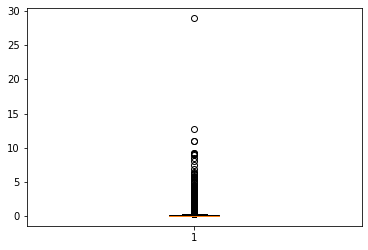

In [56]:
plt.boxplot(game.EU_Sales)

{'whiskers': [<matplotlib.lines.Line2D at 0x204d78b9820>,
 'caps': [<matplotlib.lines.Line2D at 0x204d78b9f70>,
 'boxes': [<matplotlib.lines.Line2D at 0x204d78b9490>],
 'medians': [<matplotlib.lines.Line2D at 0x204d78c66d0>],
 'fliers': [<matplotlib.lines.Line2D at 0x204d78c6a60>],
 'means': []}

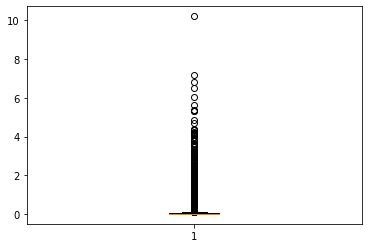

In [57]:
plt.boxplot(game.JP_Sales)

{'whiskers': [<matplotlib.lines.Line2D at 0x204d7920790>,
 'caps': [<matplotlib.lines.Line2D at 0x204d7920eb0>,
 'boxes': [<matplotlib.lines.Line2D at 0x204d7920400>],
 'medians': [<matplotlib.lines.Line2D at 0x204d792c610>],
 'fliers': [<matplotlib.lines.Line2D at 0x204d792c9a0>],
 'means': []}

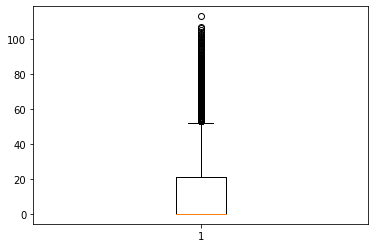

In [58]:
plt.boxplot(game.Critic_Count)

{'whiskers': [<matplotlib.lines.Line2D at 0x204d8959700>,
 'caps': [<matplotlib.lines.Line2D at 0x204d8959e20>,
 'boxes': [<matplotlib.lines.Line2D at 0x204d8959370>],
 'medians': [<matplotlib.lines.Line2D at 0x204d8966580>],
 'fliers': [<matplotlib.lines.Line2D at 0x204d8966910>],
 'means': []}

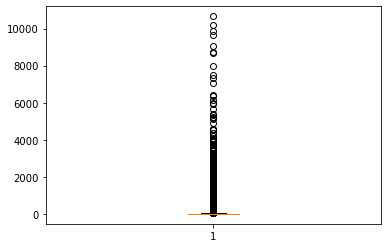

In [59]:
plt.boxplot(game.User_Count)

{'whiskers': [<matplotlib.lines.Line2D at 0x204d89c3400>,
 'caps': [<matplotlib.lines.Line2D at 0x204d89c3b20>,
 'boxes': [<matplotlib.lines.Line2D at 0x204d89c3070>],
 'medians': [<matplotlib.lines.Line2D at 0x204d89cd280>],
 'fliers': [<matplotlib.lines.Line2D at 0x204d89cd610>],
 'means': []}

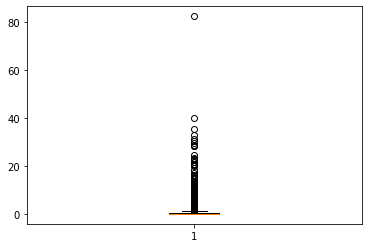

In [60]:
plt.boxplot(game.Global_Sales)

C:\Users\hp\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Genre', ylabel='count'>

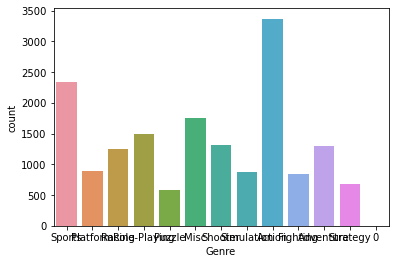

In [61]:
sns.countplot(game.Genre)

C:\Users\hp\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='User_Score', ylabel='count'>

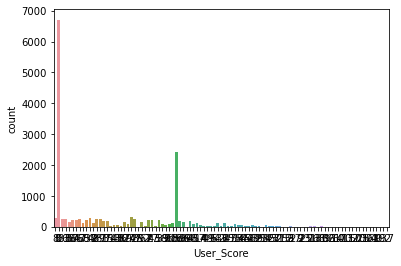

In [62]:
sns.countplot(game.User_Score)

C:\Users\hp\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Rating', ylabel='count'>

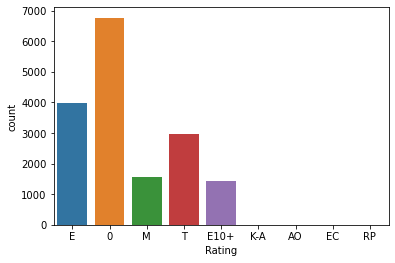

In [63]:
sns.countplot(game.Rating)

C:\Users\hp\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Developer', ylabel='count'>

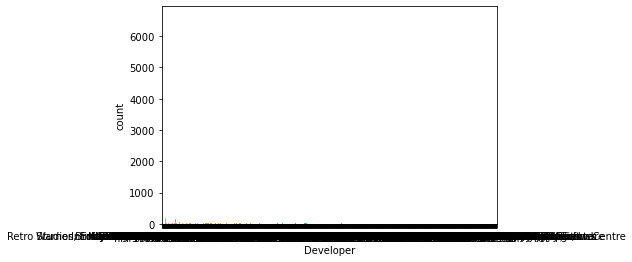

In [64]:
sns.countplot(game.Developer)

(array([1.6639e+04, 5.5000e+01, 1.5000e+01, 6.0000e+00, 0.0000e+00,
        1.0000e+00, 1.0000e+00, 1.0000e+00, 0.0000e+00, 1.0000e+00]),
 array([ 0.   ,  4.136,  8.272, 12.408, 16.544, 20.68 , 24.816, 28.952,
        33.088, 37.224, 41.36 ]),
 <BarContainer object of 10 artists>)

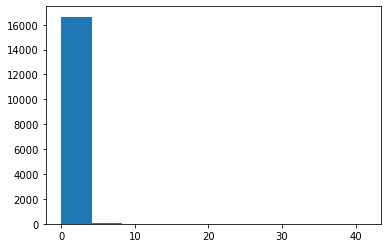

In [65]:
plt.hist(game.NA_Sales)

(array([1.6649e+04, 5.1000e+01, 1.0000e+01, 7.0000e+00, 1.0000e+00,
        0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00, 1.0000e+00]),
 array([ 0.   ,  2.896,  5.792,  8.688, 11.584, 14.48 , 17.376, 20.272,
        23.168, 26.064, 28.96 ]),
 <BarContainer object of 10 artists>)

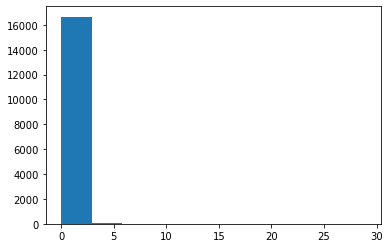

In [66]:
plt.hist(game.EU_Sales)

(array([8.582e+03, 8.000e+00, 5.400e+01, 2.220e+02, 4.320e+02, 1.040e+03,
        1.791e+03, 2.360e+03, 1.792e+03, 4.380e+02]),
 array([ 0. ,  9.8, 19.6, 29.4, 39.2, 49. , 58.8, 68.6, 78.4, 88.2, 98. ]),
 <BarContainer object of 10 artists>)

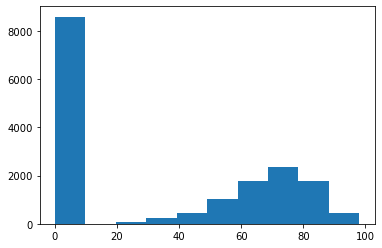

In [67]:
plt.hist(game.Critic_Score)

(array([1.0594e+04, 2.2500e+03, 1.5490e+03, 1.0410e+03, 6.0400e+02,
        3.2000e+02, 2.2100e+02, 1.0600e+02, 2.7000e+01, 7.0000e+00]),
 array([  0. ,  11.3,  22.6,  33.9,  45.2,  56.5,  67.8,  79.1,  90.4,
        101.7, 113. ]),
 <BarContainer object of 10 artists>)

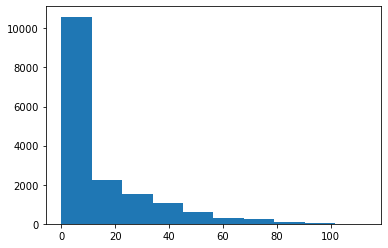

In [68]:
plt.hist(game.Critic_Count)

(array([1.6455e+04, 1.6000e+02, 5.2000e+01, 2.5000e+01, 9.0000e+00,
        6.0000e+00, 3.0000e+00, 2.0000e+00, 3.0000e+00, 4.0000e+00]),
 array([    0. ,  1066.5,  2133. ,  3199.5,  4266. ,  5332.5,  6399. ,
         7465.5,  8532. ,  9598.5, 10665. ]),
 <BarContainer object of 10 artists>)

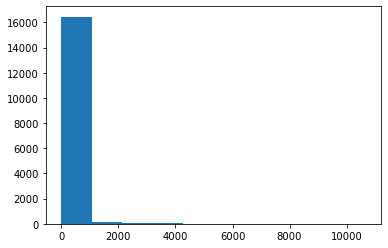

In [69]:
plt.hist(game.User_Count)

In [99]:
X=game[["Name","Platform","Genre","NA_Sales","EU_Sales","JP_Sales","Critic_Score","Critic_Count","User_Score","User_Count","Developer","source","Rating"]]
y=game[["Global_Sales"]]

In [123]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression as LR
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LinearRegression 

In [ ]:
y=game.Global_Sales.iloc[:14576]

In [ ]:
x=X.iloc[:14576]
test_game=X.iloc[14576:]

In [126]:
x_train,x_test,y_train,y_test=train_test_split(x,y,train_size=0.8,test_size=0.2,random_state=42)

In [ ]:
model=LinearRegression().fit(x_train,y_train)
print("Train Score =",model.score(x_train,y_train))
print("Test Score =",model.score(x_test,y_test))

In [ ]:
predict=model.predict(x_test)

In [77]:
from sklearn.tree import DecisionTreeClassifier

In [78]:
model1=DecisionRegression().fit(x_train,y_train)
print("Train Score =",model1.score(x_train,y_train))
print("Test Score =",model1.score(x_test,y_test))
predict_y=model1.predict(x_test)

NameError: name 'DecisionRegression' is not defined

In [ ]:
predicts=model1.predict(x_test)

In [ ]:
model2 = RandomRegression(n_estimators=100,random_state=0)
model2.fit(x_train,y_train)

In [ ]:
from sklearn.ensemble import GradientBoostingRegressor
regres = GradientBoostingRegressor(n_estimators=100,random_state=0)
regres.fit(train_x,train_y)

In [ ]:
y_pred=regres.predict(test_x)

In [ ]:
regres.score(train_x,train_y)

In [ ]:
regres.score(test_x,test_y)